In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data

data= pd.read_csv("Customer-Churn.csv")

# Creating a copy of the data
data2 = data.copy()

In [3]:
# Viewing the first 3 rows
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# Viewing the bottom rows
data.tail(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# checking the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Numerical Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# Categorical Statistical Analysis
data.describe(include=["object", "bool"]).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [8]:
# missing data
null_values = data.isnull().sum()
null_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# checking duplicates
data.duplicated().sum()

0

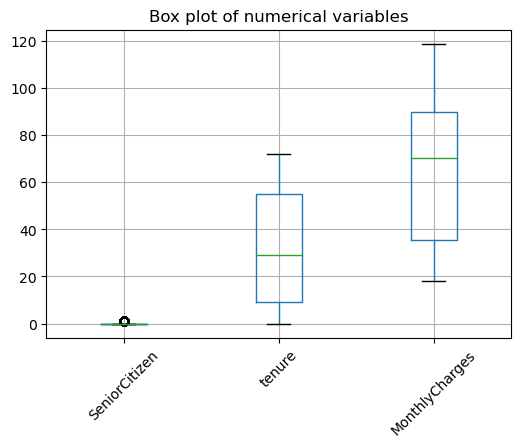

In [10]:
# checking for outliers
plt.figure(figsize=(6, 4))
data.boxplot()
plt.title("Box plot of numerical variables")
plt.xticks(rotation=45)
plt.show()

#### Exploratory Data Analysis

In [11]:
# Group Monthly Charges

def Monthlycharges_group(x):
    if x <= 38:
        return "<=38 Lowest"
    elif x <= 60:
        return "39-60 Low"
    elif x <= 81:
        return "61-81 Moderate"
    elif x <= 104:
        return "82-104 High"
    else:
        return ">=105 Highest"
    
# Applying the Function to the data
data["Monthlycharges_group"] = data["MonthlyCharges"].apply(Monthlycharges_group)
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Monthlycharges_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<=38 Lowest
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,39-60 Low
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,39-60 Low


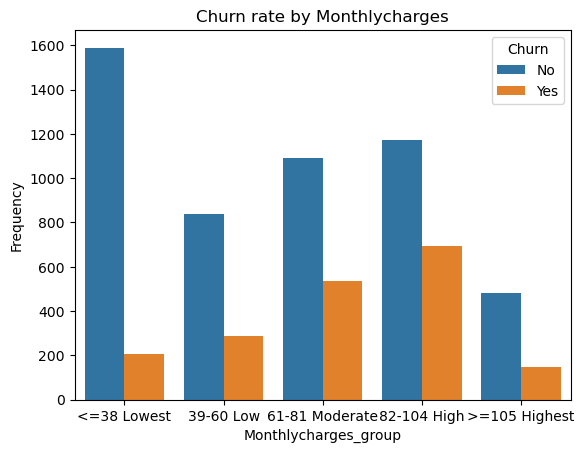

In [13]:
sns.countplot(data=data, x="Monthlycharges_group", hue="Churn")
plt.xlabel("Monthlycharges_group")
plt.ylabel("Frequency")
plt.title("Churn rate by Monthlycharges")
plt.legend(title = "Churn");

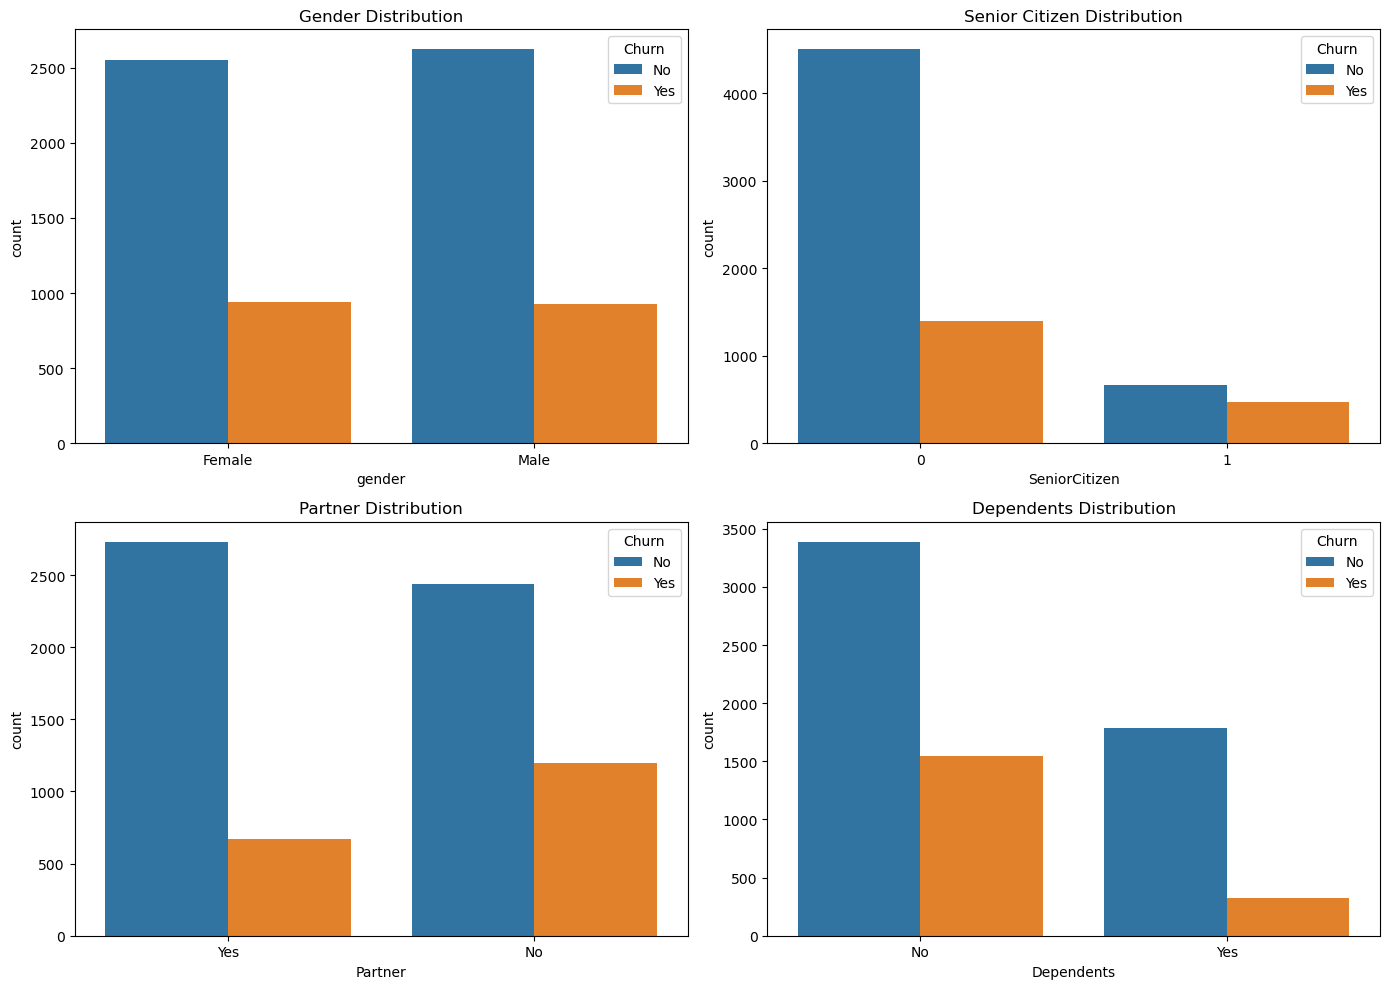

In [14]:
plt.figure(figsize=(14, 10))

# Gender distribution
plt.subplot(2, 2, 1)
sns.countplot(x='gender', data=data, hue='Churn')
plt.title('Gender Distribution')

# SeniorCitizen distribution
plt.subplot(2, 2, 2)
sns.countplot(x='SeniorCitizen', data=data, hue='Churn')
plt.title('Senior Citizen Distribution')

# Partner distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Partner', data=data, hue='Churn')
plt.title('Partner Distribution')

# Dependents distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Dependents', data=data, hue='Churn')
plt.title('Dependents Distribution')

plt.tight_layout()
plt.show()

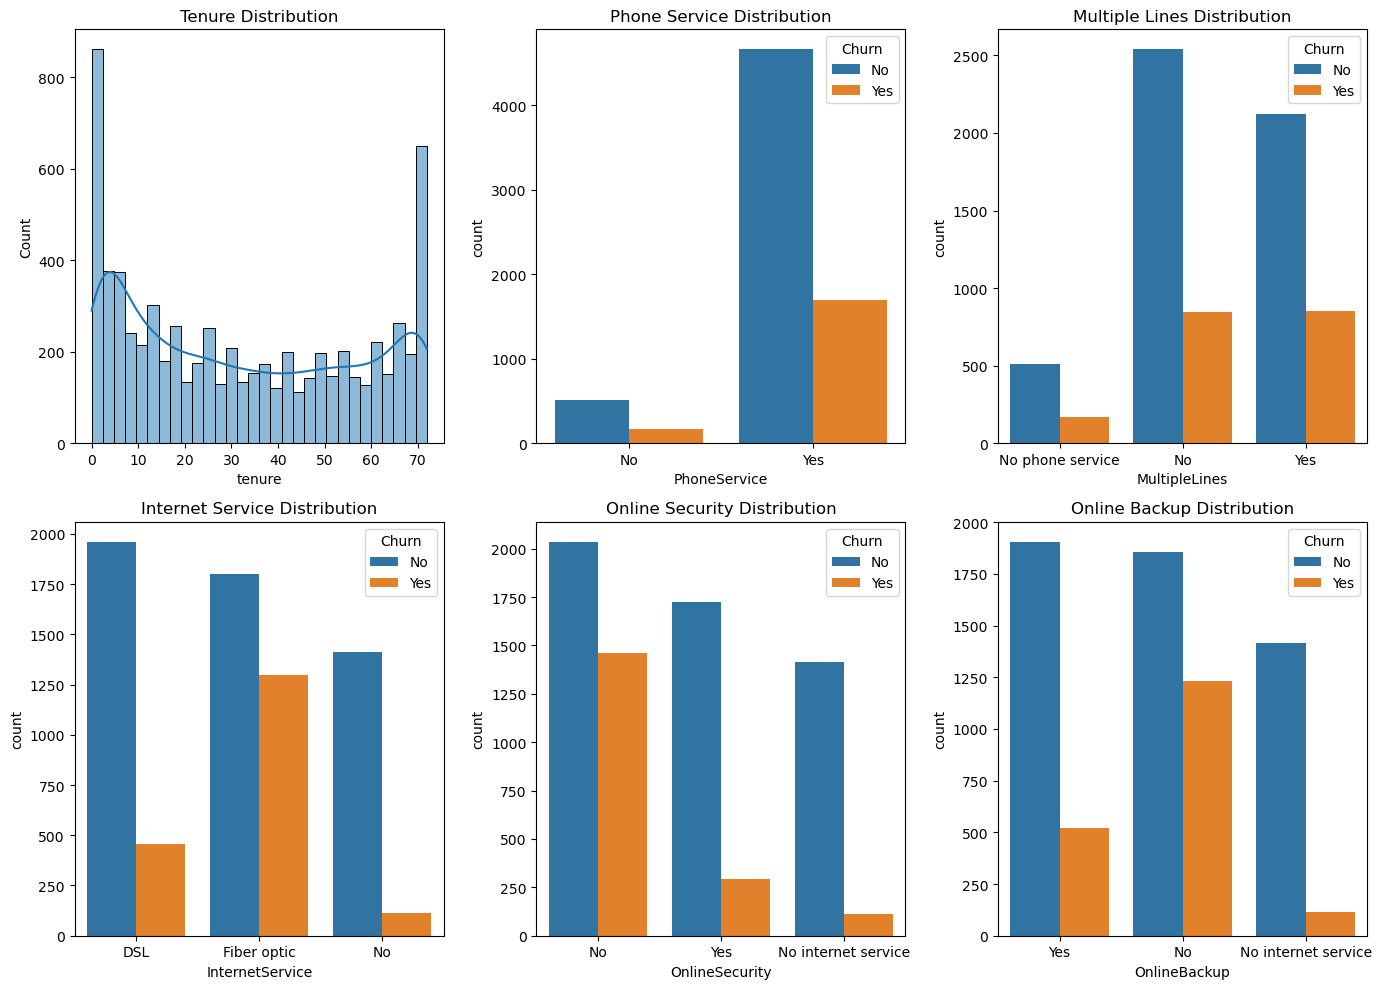

In [15]:
plt.figure(figsize=(14, 10))

# tenure distribution
plt.subplot(2, 3, 1)
sns.histplot(data['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')

# PhoneService distribution
plt.subplot(2, 3, 2)
sns.countplot(x='PhoneService', data=data, hue='Churn')
plt.title('Phone Service Distribution')

# MultipleLines distribution
plt.subplot(2, 3, 3)
sns.countplot(x='MultipleLines', data=data, hue='Churn')
plt.title('Multiple Lines Distribution')

# InternetService distribution
plt.subplot(2, 3, 4)
sns.countplot(x='InternetService', data=data, hue='Churn')
plt.title('Internet Service Distribution')

# OnlineSecurity distribution
plt.subplot(2, 3, 5)
sns.countplot(x='OnlineSecurity', data=data, hue='Churn')
plt.title('Online Security Distribution')

# OnlineBackup distribution
plt.subplot(2, 3, 6)
sns.countplot(x='OnlineBackup', data=data, hue='Churn')
plt.title('Online Backup Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot MonthlyCharges distribution
plt.subplot(1, 2, 1)
sns.histplot(data['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')

# Plot TotalCharges distribution
plt.subplot(1, 2, 2)
sns.histplot(data['TotalCharges'], bins=30, kde=True)
plt.title('Total Charges Distribution')

plt.tight_layout()
plt.show()

### Preparing and Processing the data

In [17]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Monthlycharges_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,<=38 Lowest
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,39-60 Low
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,39-60 Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,39-60 Low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,61-81 Moderate


In [44]:
new_data = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                        'PhoneService', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', "PaymentMethod", "Churn"]]

In [45]:
new_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [46]:
# encoding your data - changing categorical features into numerical ones
# one hot encoder

data_enc = pd.get_dummies(new_data, columns=['gender', 'Partner', 'Dependents', 
                        'PhoneService', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype="int64",drop_first=True)

In [47]:
# encodered data
data_enc.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [49]:
y = data_enc.pop("Churn_Yes")

In [31]:
#scaling dataset
#importing the standard scaler
from sklearn.preprocessing import MinMaxScaler

#instantiate scaler object
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_enc),columns=data_enc.columns)
scaled_data.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
#splitting data into training and validtion data sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_data, y ,train_size=0.8,random_state=42)

In [72]:
# Logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

log_pred = log_reg.predict(x_test)

# Evaluate the model
print("Logistic Regression Model")
print(" ")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))

Logistic Regression Model
 
Accuracy: 0.8005677785663591
Precision: 0.6402439024390244
Recall: 0.5630026809651475
F1 Score: 0.5991440798858774


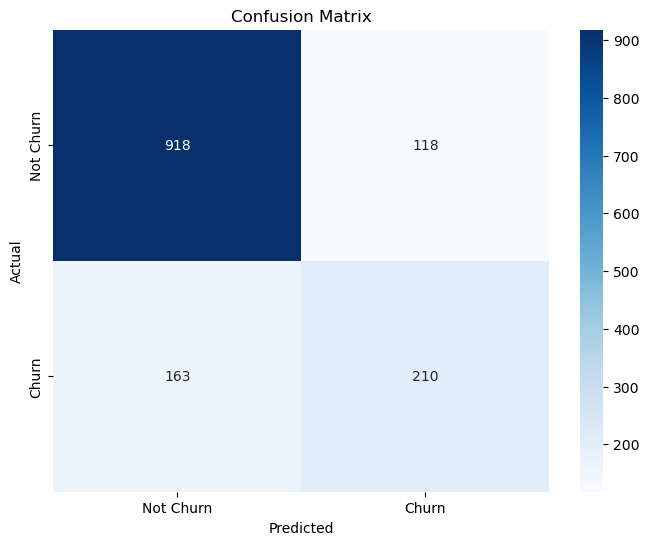

In [80]:
# Print confusion matrix

CM1 = confusion_matrix(y_test, log_pred)

# Visualise 
plt.figure(figsize=(8, 6))
sns.heatmap(CM1, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
# RandomForest Regression
from sklearn.ensemble import RandomForestClassifier

Rdf_cl = RandomForestClassifier()
Rdf_cl.fit(x_train,y_train)

Rdf_pred = Rdf_cl.predict(x_test)

# Evaluate the model
print("RandomForest Regression Model")
print(" ")
print("Accuracy:", accuracy_score(y_test, Rdf_pred))
print("Precision:", precision_score(y_test, Rdf_pred))
print("Recall:", recall_score(y_test, Rdf_pred))
print("F1 Score:", f1_score(y_test, Rdf_pred))

RandomForest Regression Model
 
Accuracy: 0.7679205110007097
Precision: 0.5771812080536913
Recall: 0.46112600536193027
F1 Score: 0.5126676602086437


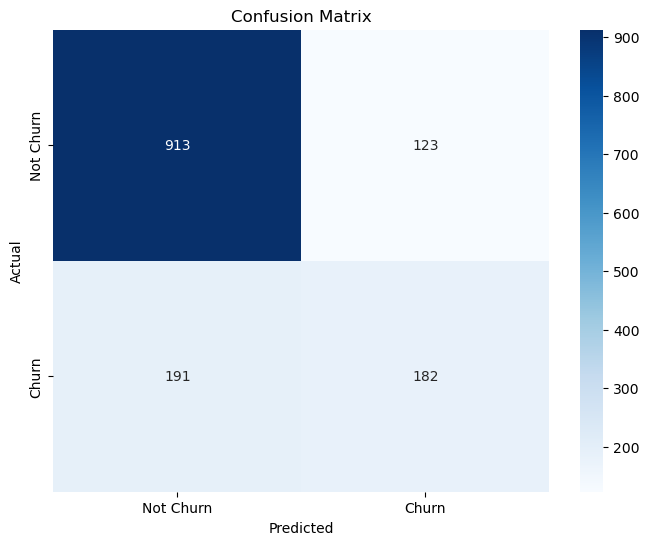

In [78]:
# Print confusion matrix

CM = confusion_matrix(y_test, Rdf_pred)

# Visualise 
plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
# import XgBoost
# !pip install xgboost
from xgboost import XGBClassifier

In [90]:
# XGB Classifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

xgb_pred = xgb.predict(x_test)

# Evaluate the model
print("XGB Classifier")
print(" ")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("F1 Score:", f1_score(y_test, xgb_pred))

XGB Classifier
 
Accuracy: 0.7771469127040455
Precision: 0.5919003115264797
Recall: 0.5093833780160858
F1 Score: 0.5475504322766571


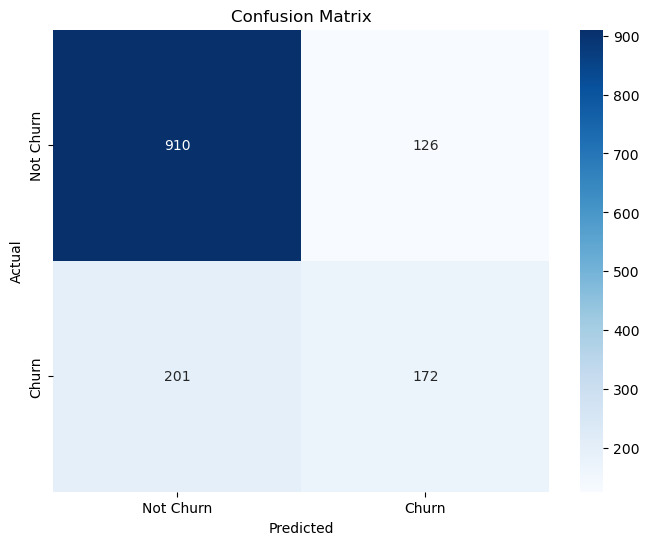

In [91]:
# Print confusion matrix
CM2 = confusion_matrix(y_test, Rdf_pred)

# Visualise 
plt.figure(figsize=(8, 6))
sns.heatmap(CM2, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()